# **Fundamentral of TensorFlow in Python**
1. Intro
2. Linear Models
3. Neural Networks
4. High Level APIs

## **Intro**

What is a tensor?
- collection of numbers with a specific shape

What is a constant?
- a simplest category of a tensor

Unlike a constant variable can be modified + variable is useful when we want to train a model by updating its parameters

In [36]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

**Constants and variables**

In [ ]:
credit_numpy = np.array([2,34,5])

In [ ]:
# Convert the credit_numpy array into a tensorflow constant
credit_constant = tf.constant(credit_numpy)

# Print constant datatype
print('\n The datatype is:', credit_constant.dtype)

# Print constant shape
print('\n The shape is:', credit_constant.shape)


 The datatype is: <dtype: 'int64'>

 The shape is: (3,)


In [ ]:
# Define the 1-dimensional variable A1
A1 = tf.Variable([1, 2, 3, 4])

# Print the variable A1
print('\n A1: ', A1)

# Convert A1 to a numpy array and assign it to B1
B1 = A1.numpy()

# Print B1
print('\n B1: ', B1)


 A1:  <tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

 B1:  [1 2 3 4]


**Basic operations**

What is element-wise multiplication?

- tensors of identical shapes, multiply elements in correspondimg positions

In [ ]:
# Define tensors A1 and A23 as constants
A1 = tf.constant([1, 2, 3, 4])
A23 = tf.constant([[1, 2, 3], [1, 6, 4]])

# Define B1 and B23 to have the correct shape
B1 = tf.ones_like([1, 2, 3, 4])
B23 = tf.ones_like([[1, 2, 3], [1, 6, 4]])

# Perform element-wise multiplication
C1 = tf.multiply(A1, B1)
C23 = tf.multiply(A23, B23)

# Print the tensors C1 and C23
print('\n C1: {}'.format(C1.numpy()))
print('\n C23: {}'.format(C23.numpy()))


 C1: [1 2 3 4]

 C23: [[1 2 3]
 [1 6 4]]


In [ ]:
# Define features, params, and bill as tf.constants
features = tf.constant([[2, 24], [2, 26], [2, 57], [1, 37]])
params = tf.constant([[1000], [150]])
bill = tf.constant([[3913], [2682], [8617], [64400]])

# Compute billpred using features and params
billpred = tf.matmul(features, params)

# Compute and print the error
error = bill - billpred
print(error.numpy())

[[-1687]
 [-3218]
 [-1933]
 [57850]]


In [ ]:
x = tf.constant([[1,1,1], [1,1,1]])

print(tf.reduce_sum(x).numpy()) # sum all the elements
print(tf.reduce_sum(x, 0).numpy()) # reduce along the first dimension
print(tf.reduce_sum(x, 1).numpy()) # reduce along the second dimesion

6
[2 2 2]
[3 3]


**Advanced operations**

*Finding the optimum*
 - minimum: lowest value of the lost function
 - maximum: highest value of a lost function
 - at this poin gradient (slope at a given point) = 0
 - change > 0 -> minimum
 -  change < 0 -> maximum

In [ ]:
gray_tensor = tf.constant(0, shape=(28, 28))
color_tensor = tf.constant(0, shape=(28, 28, 3))

# Reshape the grayscale image tensor into a vector
gray_vector = tf.reshape(gray_tensor, (784, 1))

# tf.Reshape the color image tensor into a vector
color_vector = tf.reshape(color_tensor, (2352, 1))

*loss function*  = x * x
To minimize the loss function:
- positive slope? decrease x
- negative slope? increase x

In [ ]:
def compute_gradient(x0):
  	# Define x as a variable with an initial value of x0
	x = tf.Variable(x0)
	with tf.GradientTape() as tape:
		tape.watch(x)
        # Define y using the multiply operation
		y = tf.multiply(x, x)
    # Return the gradient of y with respect to x
	return tape.gradient(y,x).numpy()

# Compute and print gradients at x = -1, 1, and 0
print(compute_gradient(-1.0))
print(compute_gradient(1.0))
print(compute_gradient(0.0))

-2.0
2.0
0.0


the slope is positive at x = 1, which means that we can lower the loss by reducing x. The slope is negative at x = -1, which means that we can lower the loss by increasing x. The slope at x = 0 is 0, which means that we cannot lower the loss by either increasing or decreasing x. This is because the loss is minimized at x = 0.

## **Linear Models**

In [ ]:
model = tf.constant([[ 1.,  0., -1.]]) # 1x3 tensor

letter = tf.constant([[1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.]]) # 3x3 tensor

# Reshape model from a 1x3 to a 3x1 tensor
model = tf.reshape(model, (3,1))

# Multiply letter by model
output = tf.matmul(letter, model)

# Sum over output and print prediction using the numpy method
prediction = tf.reduce_sum(output)
print(prediction.numpy())

1.0


model found that prediction=1.0 and correctly classified the letter as a K

**Input data**

In [ ]:
# Assign the path to a string variable named data_path
data_path = 'kc_house_data.csv'

# Load the dataset as a dataframe named housing
housing = pd.read_csv(data_path)

# Print the price column of housing
print(housing.price)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


In [ ]:
# Use a numpy array to define price as a 32-bit float
price = np.array(housing['price'], np.float32)

# Define waterfront as a Boolean using cast
waterfront = tf.cast(housing['waterfront'], tf.bool)

# Print price and waterfront
print(price) # numpy array
print(waterfront) # tensor

[221900. 538000. 180000. ... 402101. 400000. 325000.]
tf.Tensor([False False False ... False False False], shape=(21613,), dtype=bool)


**Loss functions**

In [ ]:
price = np.array([402101, 400000, 325000])
predictions = np.array([369047.72405433, 162293.96762846, 148248.92465109])

# Compute the mean absolute error (mae)
loss = tf.keras.losses.mse(price, predictions)

# Print the mean absolute error (mae)
print(loss.numpy())

29612539837.852097


In [ ]:
# Compute the mean absolute error (mae)
loss = tf.keras.losses.mae(price, predictions)

# Print the mean absolute error (mae)
print(loss.numpy())

149170.12788870666


Loss functions vary in result as they penalize the deviations in different way. MSE is more harsh with large deviations, so its is significantly higher than MAE

In [ ]:
# Initialize a variable named scalar
scalar = tf.Variable(1.0, tf.float32)
features = tf.constant([1,2,3,4,5], tf.float32)
targets = tf.constant([2,4,6,8,10], tf.float32)

# Define the model
def model(scalar, features = features):
  	return scalar * features

# Define a loss function
def loss_function(scalar, features = features, targets = targets):
	# Compute the predicted values
	predictions = model(scalar, features)

	# Return the mean absolute error loss
	return tf.keras.losses.mae(targets, predictions)

# Evaluate the loss function and print the loss
print(loss_function(scalar).numpy())

3.0


**Linear regression**

A univariate linear regression identifies the relationship between a single feature and the target tensor.

In [ ]:
size_log = tf.constant([8.639411 , 8.887652 , 9.2103405, 7.20786  , 7.7782116,
       6.9810057], tf.float32)

price_log = tf.constant([12.309982 , 13.195614 , 12.100712, 12.904459 , 12.8992195,
       12.691581], tf.float32)

# Define a linear regression model
def linear_regression(intercept, slope, features = size_log):
	return intercept + slope*features

# Set loss_function() to take the variables as arguments
def loss_function(intercept, slope, features = size_log, targets = price_log):
	# Set the predicted values
	predictions = linear_regression(intercept, slope, features)

    # Return the mean squared error loss
	return tf.keras.losses.mse(targets, predictions)

# Compute the loss for different slope and intercept values
print(loss_function(0.1, 0.1))
print(loss_function(0.1, 0.5))

tf.Tensor(138.74718, shape=(), dtype=float32)
tf.Tensor(73.112236, shape=(), dtype=float32)


In [ ]:
def plot_results(intercept, slope):
	size_range = np.linspace(6,14,100)
	price_pred = [intercept+slope*s for s in size_range]
	plt.scatter(size_log, price_log, color = 'black')
	plt.plot(size_range, price_pred, linewidth=3.0, color='red')
	plt.xlabel('log(size)')
	plt.ylabel('log(price)')
	plt.title('Scatterplot of data and fitted regression line')
	plt.show()

66.45283
2.4379816
1.8019257
2.050548
2.30178
2.1166975
1.72618
1.57312
1.5390075
1.466803


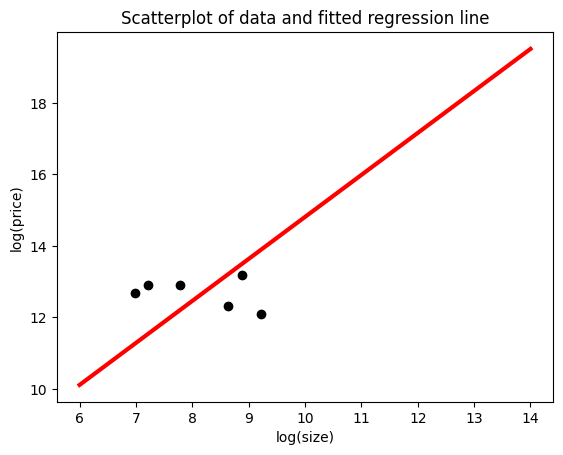

In [ ]:
# Initialize an Adam optimizer
opt = tf.keras.optimizers.Adam(0.5)
intercept = tf.Variable(0.0, tf.int32)
slope = tf.Variable(0.0, tf.int32)

for j in range(100):
	# Apply minimize, pass the loss function, and supply the variables
	opt.minimize(lambda: loss_function(intercept, slope), var_list=[intercept, slope])

	# Print every 10th value of the loss
	if j % 10 == 0:
		print(loss_function(intercept, slope).numpy())

plot_results(intercept, slope)

we printed loss_function(intercept, slope) every 10th execution for 100 executions. Each time, the loss got closer to the minimum as the optimizer moved the slope and intercept parameters closer to their optimal values.

In [ ]:
housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
import tensorflow as tf

# Initialize parameters as trainable variables
params = tf.Variable([0.1, 0.05, 0.02], dtype=tf.float32, trainable=True)

# Input features
size_log = np.log(housing['sqft_living'])
bedrooms = np.array(housing['bedrooms'])

# Target variable
price_log = np.log(housing['price'])

# Define the linear regression model
def linear_regression(params, feature1, feature2):
    return params[0] + feature1 * params[1] + feature2 * params[2]

# Define the loss function
def loss_function(params, targets, feature1, feature2):
    # Set the predicted values
    predictions = linear_regression(params, feature1, feature2)

    # Use the mean absolute error loss
    return tf.keras.losses.mae(targets, predictions)

# Define the optimization operation
opt = tf.keras.optimizers.Adam()

# Perform minimization and print trainable variables
for j in range(10):
    opt.minimize(lambda: loss_function(params, price_log, size_log, bedrooms), var_list=[params])
    loss_value = loss_function(params, price_log, size_log, bedrooms).numpy()
    print(f"Iteration {j + 1}, Loss: {loss_value}")
    print(f"Updated Parameters: {params.numpy()}")

Iteration 1, Loss: 12.498513221740723
Updated Parameters: [0.10099999 0.05       0.02099999]
Iteration 2, Loss: 12.494141578674316
Updated Parameters: [0.10199998 0.05       0.02199998]
Iteration 3, Loss: 12.48976993560791
Updated Parameters: [0.10299997 0.05       0.02299998]
Iteration 4, Loss: 12.485401153564453
Updated Parameters: [0.10399996 0.05       0.02399997]
Iteration 5, Loss: 12.48102855682373
Updated Parameters: [0.10499994 0.05       0.02499996]
Iteration 6, Loss: 12.47665786743164
Updated Parameters: [0.10599994 0.05       0.02599995]
Iteration 7, Loss: 12.472288131713867
Updated Parameters: [0.10699993 0.05       0.02699994]
Iteration 8, Loss: 12.467917442321777
Updated Parameters: [0.10799993 0.05       0.02799994]
Iteration 9, Loss: 12.463545799255371
Updated Parameters: [0.10899992 0.05       0.02899993]
Iteration 10, Loss: 12.459177017211914
Updated Parameters: [0.10999992 0.05       0.02999992]


In [ ]:
# Define the intercept and slope
intercept = tf.Variable(10.0, tf.float32)
slope = tf.Variable(0.5, tf.float32)

# Define the model
def linear_regression(intercept, slope, features):
	# Define the predicted values
	return intercept + slope*features

# Define the loss function
def loss_function(intercept, slope, targets, features):
	# Define the predicted values
	predictions = linear_regression(intercept, slope, features)

 	# Define the MSE loss
	return tf.keras.losses.mse(targets, predictions)

*Epoch* = passing though an entire dataset

*Batch* = part of the dataset

*iteration* = hpw many time you shoul feed batch to use all dataset

*Full sample* vs *batch training*


1.   one update per epoch VS multiple updates per epoch
2.   dataset modification VS no modification
3. limited memory VS no limit on data size



In [ ]:
# Initialize Adam optimizer
opt = tf.keras.optimizers.Adam()

# Load data in batches
for batch in pd.read_csv('kc_house_data.csv', chunksize=100):
	size_batch = np.array(batch['sqft_lot'], np.float32)

	# Extract the price values for the current batch
	price_batch = np.array(batch['price'], np.float32)

	# Complete the loss, fill in the variable list, and minimize
	opt.minimize(lambda: loss_function(intercept, slope, price_batch, size_batch), var_list=[intercept, slope])

# Print trained parameters
print(intercept.numpy(), slope.numpy()) # updates slope and intercept with every batch

10.217887 0.7015986


## **Neural Networks**

Two ways to define a dense layer in TensorFlow?
- low-level, linear algebraic operations
- hight-level keras operations

In [39]:
# Initialize bias1
bias1 = tf.Variable(1.0)
borrower_features = tf.constant([[ 2.,  2., 43.]])

# Initialize weights1 as 3x2 variable of ones
weights1 = tf.Variable(tf.ones((3,2)))

# Perform matrix multiplication of borrower_features and weights1
product1 = tf.matmul( borrower_features, weights1)

# Apply sigmoid activation function to product1 + bias1
dense1 = tf.keras.activations.sigmoid(product1 + bias1)

# Print shape of dense1
print("\n dense1's output shape: {}".format(dense1.shape))


 dense1's output shape: (1, 2)


In [41]:
# weights1

In [42]:
# From previous step
bias1 = tf.Variable(1.0)
weights1 = tf.Variable(tf.ones((3, 2)))
product1 = tf.matmul(borrower_features, weights1)
dense1 = tf.keras.activations.sigmoid(product1 + bias1)

# Initialize bias2 and weights2
bias2 = tf.Variable(1.0)
weights2 = tf.Variable(tf.ones((2, 1)))

# Perform matrix multiplication of dense1 and weights2
product2 = tf.matmul(dense1, weights2)

# Apply activation to product2 + bias2 and print the prediction
prediction = tf.keras.activations.sigmoid(product2 + bias2)
print('\n prediction: {}'.format(prediction.numpy()[0,0]))
print('\n actual: 1')


 prediction: 0.9525741338729858

 actual: 1


 Our model produces predicted values in the interval between 0 and 1. For the example we considered, the actual value was 1 and the predicted value was a probability between 0 and 1. This, of course, is not meaningful, since we have not yet trained our model's parameters.

In [43]:
# Define borrower_features tensor
borrower_features = tf.constant([[3., 3., 23.],
                                 [2., 1., 24.],
                                 [1., 1., 49.],
                                 [1., 1., 49.],
                                 [2., 1., 29.]], dtype=tf.float32)

# Define weights1 tensor
weights1 = tf.constant([[-0.6, 0.6],
                        [0.8, -0.3],
                        [-0.09, -0.08]], dtype=tf.float32)

# Define bias1 tensor
bias1 = tf.constant([0.1], dtype=tf.float32)

In [44]:
# Compute the product of borrower_features and weights1
products1 = tf.matmul(borrower_features, weights1)

# Apply a sigmoid activation function to products1 + bias1
dense1 = tf.keras.activations.sigmoid(products1 + bias1)

# Print the shapes of borrower_features, weights1, bias1, and dense1
print('\n shape of borrower_features: ', borrower_features.shape)
print('\n shape of weights1: ', weights1.shape)
print('\n shape of bias1: ', bias1.shape)
print('\n shape of dense1: ', dense1.shape)


 shape of borrower_features:  (5, 3)

 shape of weights1:  (3, 2)

 shape of bias1:  (1,)

 shape of dense1:  (5, 2)


our input data, borrower_features, is 5x3 because it consists of 5 examples for 3 features. The shape of weights1 is 3x2, as it was in the previous exercise, since it does not depend on the number of examples. Additionally, bias1 is a scalar. Finally, dense1 is 5x2, which means that we can multiply it by the following set  weights2 which we defined to be 2x1 in the previous exercise.

In [45]:
borrower_features = tf.constant([[6.96469188e-01, 2.86139339e-01, 2.26851448e-01, 5.51314771e-01,
        7.19468951e-01, 4.23106462e-01, 9.80764210e-01, 6.84829712e-01,
        4.80931908e-01, 3.92117530e-01],
       [3.43178004e-01, 7.29049683e-01, 4.38572258e-01, 5.96778952e-02,
        3.98044258e-01, 7.37995386e-01, 1.82491735e-01, 1.75451756e-01,
        5.31551361e-01, 5.31827569e-01],
       [6.34400964e-01, 8.49431813e-01, 7.24455297e-01, 6.11023486e-01,
        7.22443402e-01, 3.22958916e-01, 3.61788660e-01, 2.28263229e-01,
        2.93714046e-01, 6.30976140e-01],
       [9.21049416e-02, 4.33701187e-01, 4.30862755e-01, 4.93685097e-01,
        4.25830305e-01, 3.12261224e-01, 4.26351309e-01, 8.93389165e-01,
        9.44160044e-01, 5.01836658e-01],
       [6.23952925e-01, 1.15618393e-01, 3.17285478e-01, 4.14826214e-01,
        8.66309166e-01, 2.50455379e-01, 4.83034253e-01, 9.85559762e-01,
        5.19485116e-01, 6.12894535e-01],
       [1.20628662e-01, 8.26340795e-01, 6.03060126e-01, 5.45068026e-01,
        3.42763841e-01, 3.04120779e-01, 4.17022198e-01, 6.81300759e-01,
        8.75456870e-01, 5.10422349e-01],
       [6.69313788e-01, 5.85936546e-01, 6.24903500e-01, 6.74689054e-01,
        8.42342436e-01, 8.31949860e-02, 7.63682842e-01, 2.43666381e-01,
        1.94222957e-01, 5.72456956e-01],
       [9.57125202e-02, 8.85326803e-01, 6.27248943e-01, 7.23416328e-01,
        1.61292069e-02, 5.94431877e-01, 5.56785166e-01, 1.58959642e-01,
        1.53070509e-01, 6.95529521e-01],
       [3.18766415e-01, 6.91970289e-01, 5.54383278e-01, 3.88950586e-01,
        9.25132513e-01, 8.41669977e-01, 3.57397556e-01, 4.35914621e-02,
        3.04768085e-01, 3.98185670e-01],
       [7.04958856e-01, 9.95358467e-01, 3.55914861e-01, 7.62547791e-01,
        5.93176901e-01, 6.91701770e-01, 1.51127458e-01, 3.98876280e-01,
        2.40855902e-01, 3.43456000e-01],
       [5.13128161e-01, 6.66624546e-01, 1.05908483e-01, 1.30894944e-01,
        3.21980596e-01, 6.61564350e-01, 8.46506238e-01, 5.53257346e-01,
        8.54452491e-01, 3.84837806e-01],
       [3.16787899e-01, 3.54264677e-01, 1.71081826e-01, 8.29112649e-01,
        3.38670850e-01, 5.52370071e-01, 5.78551471e-01, 5.21533072e-01,
        2.68806447e-03, 9.88345444e-01],
       [9.05341566e-01, 2.07635865e-01, 2.92489409e-01, 5.20010173e-01,
        9.01911378e-01, 9.83630896e-01, 2.57542074e-01, 5.64359069e-01,
        8.06968689e-01, 3.94370049e-01],
       [7.31073022e-01, 1.61069021e-01, 6.00698590e-01, 8.65864456e-01,
        9.83521581e-01, 7.93657899e-02, 4.28347290e-01, 2.04542860e-01,
        4.50636476e-01, 5.47763586e-01],
       [9.33267102e-02, 2.96860784e-01, 9.27584231e-01, 5.69003761e-01,
        4.57412004e-01, 7.53525972e-01, 7.41862178e-01, 4.85790335e-02,
        7.08697379e-01, 8.39243352e-01],
       [1.65937886e-01, 7.80997932e-01, 2.86536604e-01, 3.06469738e-01,
        6.65261447e-01, 1.11392170e-01, 6.64872468e-01, 8.87856781e-01,
        6.96311295e-01, 4.40327883e-01],
       [4.38214391e-01, 7.65096068e-01, 5.65641999e-01, 8.49041641e-02,
        5.82671106e-01, 8.14843714e-01, 3.37066382e-01, 9.27576602e-01,
        7.50716984e-01, 5.74063838e-01],
       [7.51644015e-01, 7.91489631e-02, 8.59389067e-01, 8.21504116e-01,
        9.09871638e-01, 1.28631204e-01, 8.17800835e-02, 1.38415575e-01,
        3.99378717e-01, 4.24306870e-01],
       [5.62218368e-01, 1.22243546e-01, 2.01399505e-01, 8.11644375e-01,
        4.67987567e-01, 8.07938218e-01, 7.42637832e-03, 5.51592708e-01,
        9.31932151e-01, 5.82175434e-01],
       [2.06095725e-01, 7.17757583e-01, 3.78985852e-01, 6.68383956e-01,
        2.93197222e-02, 6.35900378e-01, 3.21979336e-02, 7.44780660e-01,
        4.72912997e-01, 1.21754356e-01],
       [5.42635918e-01, 6.67744428e-02, 6.53364897e-01, 9.96086299e-01,
        7.69397318e-01, 5.73774099e-01, 1.02635257e-01, 6.99834049e-01,
        6.61167860e-01, 4.90971319e-02],
       [7.92299330e-01, 5.18716574e-01, 4.25867707e-01, 7.88187146e-01,
        4.11569238e-01, 4.81026262e-01, 1.81628838e-01, 3.21318895e-01,
        8.45533013e-01, 1.86903745e-01],
       [4.17291075e-01, 9.89034534e-01, 2.36599818e-01, 9.16832328e-01,
        9.18397486e-01, 9.12963450e-02, 4.63652730e-01, 5.02216339e-01,
        3.13668936e-01, 4.73395362e-02],
       [2.41685644e-01, 9.55296382e-02, 2.38249913e-01, 8.07791114e-01,
        8.94978285e-01, 4.32228930e-02, 3.01946849e-01, 9.80582178e-01,
        5.39504826e-01, 6.26309335e-01],
       [5.54540846e-03, 4.84909445e-01, 9.88328516e-01, 3.75185519e-01,
        9.70381573e-02, 4.61908758e-01, 9.63004470e-01, 3.41830611e-01,
        7.98922718e-01, 7.98846304e-01],
       [2.08248302e-01, 4.43367690e-01, 7.15601265e-01, 4.10519779e-01,
        1.91006958e-01, 9.67494309e-01, 6.50750339e-01, 8.65459859e-01,
        2.52423584e-02, 2.66905814e-01],
       [5.02071083e-01, 6.74486384e-02, 9.93033290e-01, 2.36462399e-01,
        3.74292195e-01, 2.14011908e-01, 1.05445869e-01, 2.32479781e-01,
        3.00610125e-01, 6.34442270e-01],
       [2.81234771e-01, 3.62276763e-01, 5.94284385e-03, 3.65719140e-01,
        5.33885956e-01, 1.62015840e-01, 5.97433090e-01, 2.93152481e-01,
        6.32050514e-01, 2.61966046e-02],
       [8.87593448e-01, 1.61186308e-02, 1.26958027e-01, 7.77162433e-01,
        4.58952338e-02, 7.10998714e-01, 9.71046150e-01, 8.71682942e-01,
        7.10161626e-01, 9.58509743e-01],
       [4.29813325e-01, 8.72878909e-01, 3.55957657e-01, 9.29763675e-01,
        1.48777649e-01, 9.40029025e-01, 8.32716227e-01, 8.46054852e-01,
        1.23923011e-01, 5.96486926e-01],
       [1.63924806e-02, 7.21184373e-01, 7.73751410e-03, 8.48222747e-02,
        2.25498408e-01, 8.75124514e-01, 3.63576323e-01, 5.39959908e-01,
        5.68103194e-01, 2.25463361e-01],
       [5.72146773e-01, 6.60951793e-01, 2.98245400e-01, 4.18626845e-01,
        4.53088939e-01, 9.32350636e-01, 5.87493777e-01, 9.48252380e-01,
        5.56034744e-01, 5.00561416e-01],
       [3.53221106e-03, 4.80889052e-01, 9.27455008e-01, 1.98365688e-01,
        5.20911328e-02, 4.06778902e-01, 3.72396469e-01, 8.57153058e-01,
        2.66111158e-02, 9.20149207e-01],
       [6.80903018e-01, 9.04226005e-01, 6.07529044e-01, 8.11953306e-01,
        3.35543871e-01, 3.49566221e-01, 3.89874220e-01, 7.54797101e-01,
        3.69291186e-01, 2.42219806e-01],
       [9.37668383e-01, 9.08011079e-01, 3.48797321e-01, 6.34638071e-01,
        2.73842216e-01, 2.06115127e-01, 3.36339533e-01, 3.27099890e-01,
        8.82276118e-01, 8.22303832e-01],
       [7.09623218e-01, 9.59345222e-01, 4.22543347e-01, 2.45033041e-01,
        1.17398441e-01, 3.01053345e-01, 1.45263731e-01, 9.21861008e-02,
        6.02932215e-01, 3.64187449e-01],
       [5.64570367e-01, 1.91335723e-01, 6.76905870e-01, 2.15505451e-01,
        2.78023601e-01, 7.41760433e-01, 5.59737921e-01, 3.34836423e-01,
        5.42988777e-01, 6.93984687e-01],
       [9.12132144e-01, 5.80713212e-01, 2.32686386e-01, 7.46697605e-01,
        7.77769029e-01, 2.00401321e-01, 8.20574224e-01, 4.64934856e-01,
        7.79766679e-01, 2.37478226e-01],
       [3.32580268e-01, 9.53697145e-01, 6.57815099e-01, 7.72877812e-01,
        6.88374341e-01, 2.04304114e-01, 4.70688760e-01, 8.08963895e-01,
        6.75035119e-01, 6.02788571e-03],
       [8.74077454e-02, 3.46794724e-01, 9.44365561e-01, 4.91190493e-01,
        2.70176262e-01, 3.60423714e-01, 2.10652635e-01, 4.21200067e-01,
        2.18035445e-01, 8.45752478e-01],
       [4.56270605e-01, 2.79802024e-01, 9.32891667e-01, 3.14351350e-01,
        9.09714639e-01, 4.34180908e-02, 7.07115054e-01, 4.83889043e-01,
        4.44221050e-01, 3.63233462e-02],
       [4.06831913e-02, 3.32753628e-01, 9.47119534e-01, 6.17659986e-01,
        3.68874848e-01, 6.11977041e-01, 2.06131533e-01, 1.65066436e-01,
        3.61817271e-01, 8.63353372e-01],
       [5.09401739e-01, 2.96901524e-01, 9.50251639e-01, 8.15966070e-01,
        3.22973937e-01, 9.72098231e-01, 9.87351120e-01, 4.08660144e-01,
        6.55923128e-01, 4.05653208e-01],
       [2.57348120e-01, 8.26526731e-02, 2.63610333e-01, 2.71479845e-01,
        3.98639083e-01, 1.84886038e-01, 9.53818381e-01, 1.02879882e-01,
        6.25208557e-01, 4.41697389e-01],
       [4.23518062e-01, 3.71991783e-01, 8.68314683e-01, 2.80476987e-01,
        2.05761567e-02, 9.18097019e-01, 8.64480257e-01, 2.76901782e-01,
        5.23487568e-01, 1.09088197e-01],
       [9.34270695e-02, 8.37466121e-01, 4.10265714e-01, 6.61716521e-01,
        9.43200588e-01, 2.45130599e-01, 1.31598311e-02, 2.41484065e-02,
        7.09385693e-01, 9.24551904e-01],
       [4.67330277e-01, 3.75109136e-01, 5.42860448e-01, 8.58916819e-01,
        6.52153850e-01, 2.32979894e-01, 7.74580181e-01, 1.34613499e-01,
        1.65559977e-01, 6.12682283e-01],
       [2.38783404e-01, 7.04778552e-01, 3.49518538e-01, 2.77423948e-01,
        9.98918414e-01, 4.06161249e-02, 6.45822525e-01, 3.86995859e-02,
        7.60210276e-01, 2.30089962e-01],
       [8.98318663e-02, 6.48449719e-01, 7.32601225e-01, 6.78095341e-01,
        5.19009456e-02, 2.94306934e-01, 4.51088339e-01, 2.87103295e-01,
        8.10513437e-01, 1.31115109e-01],
       [6.12179339e-01, 9.88214970e-01, 9.02556539e-01, 2.22157061e-01,
        8.18876142e-05, 9.80597317e-01, 8.82712960e-01, 9.19472456e-01,
        4.15503561e-01, 7.44615436e-01],
       [2.12831497e-01, 3.92304063e-01, 8.51548076e-01, 1.27612218e-01,
        8.93865347e-01, 4.96507972e-01, 4.26095665e-01, 3.05646390e-01,
        9.16848779e-01, 5.17623484e-01],
       [8.04026365e-01, 8.57651770e-01, 9.22382355e-01, 3.03380728e-01,
        3.39810848e-01, 5.95073879e-01, 4.41324145e-01, 9.32842553e-01,
        3.97564054e-01, 4.77778047e-01],
       [6.17186069e-01, 4.04739499e-01, 9.92478430e-01, 9.88512859e-02,
        2.20603317e-01, 3.22655141e-01, 1.47722840e-01, 2.84219235e-01,
        7.79245317e-01, 5.22891998e-01],
       [3.39536369e-02, 9.82622564e-01, 6.16006494e-01, 5.89394793e-02,
        6.61168754e-01, 3.78369361e-01, 1.35673299e-01, 5.63664615e-01,
        7.27079928e-01, 6.71126604e-01],
       [2.47513160e-01, 5.24866223e-01, 5.37663460e-01, 7.16803372e-01,
        3.59867334e-01, 7.97732592e-01, 6.27921820e-01, 3.83316055e-02,
        5.46479046e-01, 8.61912072e-01],
       [5.67574143e-01, 1.75828263e-01, 5.10376394e-01, 7.56945848e-01,
        1.10105194e-01, 8.17099094e-01, 1.67481646e-01, 5.34076512e-01,
        3.85743469e-01, 2.48623773e-01],
       [6.47432506e-01, 3.73921096e-02, 7.60045826e-01, 5.26940644e-01,
        8.75771224e-01, 5.20718336e-01, 3.50331701e-02, 1.43600971e-01,
        7.95604587e-01, 4.91976053e-01],
       [4.41879272e-01, 3.18434775e-01, 2.84549206e-01, 9.65886295e-01,
        4.32969332e-01, 8.84003043e-01, 6.48163140e-01, 8.58427644e-01,
        8.52449536e-01, 9.56312001e-01],
       [6.97942257e-01, 8.05396914e-01, 7.33127892e-01, 6.05226815e-01,
        7.17354119e-01, 7.15750396e-01, 4.09077927e-02, 5.16110837e-01,
        7.92651355e-01, 2.42962182e-01],
       [4.65147972e-01, 4.34985697e-01, 4.02787179e-01, 1.21839531e-01,
        5.25711536e-01, 4.46248353e-01, 6.63392782e-01, 5.49413085e-01,
        2.75429301e-02, 3.19179893e-02],
       [7.01359808e-01, 7.07581103e-01, 9.59939122e-01, 8.76704693e-01,
        4.68059659e-01, 6.25906527e-01, 4.57181722e-01, 2.22946241e-01,
        3.76677006e-01, 1.03884235e-01],
       [6.66527092e-01, 1.92030147e-01, 4.75467801e-01, 9.67436612e-01,
        3.16689312e-02, 1.51729956e-01, 2.98579186e-01, 9.41806972e-01,
        9.08841789e-01, 1.62000835e-01],
       [9.81117785e-01, 7.50747502e-01, 5.39977074e-01, 9.31702912e-01,
        8.80607128e-01, 3.91316503e-01, 6.56343222e-01, 6.47385120e-01,
        3.26968193e-01, 1.79390177e-01],
       [4.66809869e-01, 2.63281047e-01, 3.55065137e-01, 9.54143941e-01,
        4.61137861e-01, 6.84891462e-01, 3.36229891e-01, 9.95861053e-01,
        6.58767581e-01, 1.96009472e-01],
       [9.81839970e-02, 9.43180561e-01, 9.44777846e-01, 6.21328354e-01,
        1.69914998e-02, 2.25534886e-01, 8.01276803e-01, 8.75459850e-01,
        4.53989804e-01, 3.65520626e-01],
       [2.74224997e-01, 1.16970517e-01, 1.15744539e-01, 9.52602684e-01,
        8.08626115e-01, 1.64779365e-01, 2.07050055e-01, 6.55551553e-01,
        7.64664233e-01, 8.10314834e-01],
       [1.63337693e-01, 9.84128296e-01, 2.27802068e-01, 5.89415431e-01,
        5.87615728e-01, 9.67361867e-01, 6.57667458e-01, 5.84904253e-01,
        5.18772602e-01, 7.64657557e-01],
       [1.06055260e-01, 2.09190114e-03, 9.52488840e-01, 4.98657674e-01,
        3.28335375e-01, 3.68053257e-01, 8.03843319e-01, 3.82370204e-01,
        7.70169199e-01, 4.40461993e-01],
       [8.44077468e-01, 7.62040615e-02, 4.81128335e-01, 4.66849715e-01,
        2.64327973e-01, 9.43614721e-01, 9.05028462e-01, 4.43596303e-01,
        9.71596092e-02, 2.06783146e-01],
       [2.71491826e-01, 4.84219760e-01, 3.38377118e-01, 7.74136066e-01,
        4.76026595e-01, 8.70370507e-01, 9.95781779e-01, 2.19835952e-01,
        6.11671388e-01, 8.47502291e-01],
       [9.45236623e-01, 2.90086418e-01, 7.27042735e-01, 1.50161488e-02,
        8.79142463e-01, 6.39385507e-02, 7.33395398e-01, 9.94610369e-01,
        5.01189768e-01, 2.09333986e-01],
       [5.94643593e-01, 6.24149978e-01, 6.68072760e-01, 1.72611743e-01,
        8.98712695e-01, 6.20991349e-01, 4.35687043e-02, 6.84041083e-01,
        1.96084052e-01, 2.73407809e-02],
       [5.50953269e-01, 8.13313663e-01, 8.59941125e-01, 1.03520922e-01,
        6.63042784e-01, 7.10075200e-01, 2.94516981e-01, 9.71364021e-01,
        2.78687477e-01, 6.99821860e-02],
       [5.19280374e-01, 6.94314897e-01, 2.44659781e-01, 3.38582188e-01,
        5.63627958e-01, 8.86678159e-01, 7.47325897e-01, 2.09591955e-01,
        2.51777083e-01, 5.23880661e-01],
       [7.68958688e-01, 6.18761778e-01, 5.01324296e-01, 5.97125351e-01,
        7.56060004e-01, 5.37079811e-01, 8.97752762e-01, 9.47067499e-01,
        9.15354490e-01, 7.54518330e-01],
       [2.46321008e-01, 3.85271460e-01, 2.79999942e-01, 6.57660246e-01,
        3.24221611e-01, 7.54391611e-01, 1.13509081e-01, 7.75364757e-01,
        5.85901976e-01, 8.35388660e-01],
       [4.30875659e-01, 6.24964476e-01, 5.54412127e-01, 9.75671291e-01,
        7.55474389e-01, 5.44813275e-01, 1.74032092e-01, 9.04114246e-01,
        2.05837786e-01, 6.50043249e-01],
       [9.36471879e-01, 2.23579630e-01, 2.25923538e-01, 8.51818919e-01,
        8.27655017e-01, 3.51703346e-01, 2.65096277e-01, 1.27388477e-01,
        9.87936080e-01, 8.35343122e-01],
       [8.99391592e-01, 5.13679326e-01, 1.14384830e-01, 5.25803380e-02,
        3.30582112e-01, 9.20330405e-01, 9.47581828e-01, 8.41163874e-01,
        1.58679143e-01, 4.19923156e-01],
       [2.46242926e-01, 2.05349773e-01, 6.84825838e-01, 4.86111671e-01,
        3.24909657e-01, 1.00214459e-01, 5.44763386e-01, 3.47025156e-01,
        3.91095817e-01, 3.10508728e-01],
       [3.87195200e-01, 5.55859566e-01, 1.41438060e-02, 8.47647011e-01,
        9.21919882e-01, 5.50529718e-01, 2.68021107e-01, 9.90239024e-01,
        3.83194029e-01, 6.93655372e-01],
       [6.89952552e-01, 4.34309065e-01, 1.99158162e-01, 9.66579378e-01,
        6.36908561e-02, 4.85149384e-01, 2.20730707e-01, 2.93974131e-01,
        8.28527331e-01, 3.67265552e-01],
       [8.33482668e-02, 1.96309000e-01, 8.60373437e-01, 9.77028847e-01,
        2.67982155e-01, 6.75408959e-01, 8.11989978e-02, 7.23465621e-01,
        4.16436613e-01, 9.18159902e-01],
       [3.11536163e-01, 9.41466987e-01, 5.03247440e-01, 3.48892927e-01,
        6.47019625e-01, 2.49746203e-01, 2.29763597e-01, 1.96346447e-01,
        9.59899545e-01, 4.92913723e-01],
       [7.51614988e-01, 4.73991871e-01, 5.87540150e-01, 5.84138989e-01,
        9.79886293e-01, 6.68433130e-01, 2.39769474e-01, 1.51976589e-02,
        2.18682140e-01, 4.55519646e-01],
       [3.93420339e-01, 8.12326252e-01, 7.85556734e-01, 8.90959650e-02,
        9.52010751e-01, 5.27456701e-01, 5.96403956e-01, 4.05056775e-01,
        6.49500966e-01, 8.71326327e-01],
       [6.73935950e-01, 9.70098555e-01, 7.01122224e-01, 8.21720719e-01,
        4.50395830e-02, 6.72698498e-01, 6.54752672e-01, 1.01746053e-01,
        8.42387497e-01, 6.14172399e-01],
       [9.83280912e-02, 5.94467103e-01, 4.78415847e-01, 2.33293563e-01,
        1.97560899e-02, 3.65567267e-01, 6.19851053e-01, 3.29279125e-01,
        3.07254642e-01, 7.51121223e-01],
       [7.58624673e-01, 7.18765855e-01, 1.01181954e-01, 5.16165972e-01,
        5.57798684e-01, 7.44804502e-01, 9.03177738e-01, 3.69038880e-01,
        4.28663462e-01, 7.32767463e-01],
       [6.62636399e-01, 5.57869911e-01, 3.50139618e-01, 1.95352346e-01,
        1.83807373e-01, 8.15832913e-02, 8.12008530e-02, 8.45798194e-01,
        3.83672744e-01, 6.07396215e-02],
       [8.96425664e-01, 2.23270476e-01, 2.68124431e-01, 1.94497839e-01,
        9.67501044e-01, 1.12540089e-01, 7.22163260e-01, 9.32088733e-01,
        6.68001294e-01, 8.58726621e-01],
       [2.42447108e-01, 6.73927963e-01, 7.00871348e-01, 4.58332509e-01,
        8.70545626e-01, 6.94386125e-01, 8.94877791e-01, 7.53204346e-01,
        5.20290434e-01, 4.98688221e-01],
       [4.53727633e-01, 2.16468628e-02, 5.35141408e-01, 4.22973245e-01,
        1.57533601e-01, 1.19069695e-01, 4.49351877e-01, 3.99130546e-02,
        9.86579895e-01, 3.78120929e-01],
       [3.82109195e-01, 5.11263013e-02, 4.26672339e-01, 1.57454368e-02,
        3.00936326e-02, 3.39099228e-01, 8.20968926e-01, 4.58821088e-01,
        1.48405796e-02, 1.63220033e-01],
       [7.39922702e-01, 7.38293707e-01, 7.54522920e-01, 3.51669371e-01,
        3.52276951e-01, 8.02075684e-01, 3.98137897e-01, 7.27191031e-01,
        5.81122994e-01, 3.64341676e-01],
       [8.00065175e-02, 1.16125375e-01, 8.89558733e-01, 4.52340513e-01,
        9.94004548e-01, 3.63896936e-01, 2.49954298e-01, 3.50539327e-01,
        3.43086094e-01, 6.37356758e-01],
       [1.27375638e-02, 7.63268650e-01, 4.16414618e-01, 4.32239205e-01,
        4.81115013e-01, 4.49212462e-01, 4.97470886e-01, 3.45904320e-01,
        4.53346133e-01, 4.04651344e-01],
       [5.18242717e-01, 6.23269081e-01, 2.41040602e-01, 5.08437157e-01,
        5.94621897e-01, 1.69483144e-02, 5.20493746e-01, 2.39293247e-01,
        4.04538542e-01, 8.26530159e-01],
       [3.26235592e-01, 4.83216912e-01, 2.47411542e-02, 3.08750868e-01,
        6.39721096e-01, 3.15161765e-01, 2.05797508e-01, 2.90655673e-01,
        9.54378307e-01, 8.68018195e-02],
       [4.63357776e-01, 5.83869033e-02, 5.38658261e-01, 1.46035731e-01,
        6.34084821e-01, 2.64397472e-01, 6.90915406e-01, 3.47146064e-01,
        4.16848855e-03, 2.94894695e-01]], dtype=tf.float32)

In [46]:
# Define the first dense layer
dense1 = tf.keras.layers.Dense(7, activation='sigmoid')(borrower_features)

# Define a dense layer with 3 output nodes
dense2 = tf.keras.layers.Dense(3, activation='sigmoid')(dense1)

# Define a dense layer with 1 output node
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(dense2)

# Print the shapes of dense1, dense2, and predictions
print('\n shape of dense1: ', dense1.shape)
print('\n shape of dense2: ', dense2.shape)
print('\n shape of predictions: ', predictions.shape)


 shape of dense1:  (100, 7)

 shape of dense2:  (100, 3)

 shape of predictions:  (100, 1)


*Activation functions*:
- sogmoid: binary classifications
- relu
- softmax: > 2 classes

In [47]:
bill_amounts = tf.constant([[77479, 77057, 78102],
       [  326,   326,   326],
       [13686,  1992,   604],
       [  944,  1819,  1133],
       [    0,     0,     0],
       [96491, 94043, 97522]], tf.float32)

default = tf.constant([[0],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [ ]:
# Define first dense layer
dense1 = tf.keras.layers.Dense(3, activation='relu')(bill_amounts)

# Define second dense layer
dense2 = tf.keras.layers.Dense(2, "relu")(dense1)

# Define output layer
outputs = tf.keras.layers.Dense(1, "sigmoid")(dense2)

# Print error for first five examples
error = default[:5] - outputs.numpy()[:5]
print(error)

tf.Tensor(
[[0]
 [0]
 [0]
 [0]
 [1]], shape=(5, 1), dtype=int32)


errors change each time we run the code. This is because using an untrained model with randomly initialized parameters. Furthermore, the errors fall on the interval between -1 and 1 because default is a binary variable that takes on values of 0 and 1 and outputs is a probability between 0 and 1.

In [48]:
borrower_features = tf.constant([[180201, 181443, 155045,   3100,  92101,   3200],
       [ 12200,   8140,  10176,  15027,    639,    547],
       [  1078,   5543,    500,    617,      0,      0],
       [   291,    763,   2403,      0,      0,    291],
       [ 86076,  87567,  78646,   3116,   2000,   2100],
       [  7791,   5851,    430,   2041,    775,    580]], tf.float32)

In [49]:
inputs = tf.constant(borrower_features, tf.float32)

# Define first dense layer
dense1 = tf.keras.layers.Dense(10, activation='sigmoid')(inputs)

# Define second dense layer
dense2 = tf.keras.layers.Dense(8, activation="relu")(dense1)

# Define output layer
outputs = tf.keras.layers.Dense(6,activation="softmax")(dense2)

# Print first five predictions
print(outputs.numpy()[:5])

[[0.10479642 0.12526429 0.21481171 0.09495132 0.13659799 0.32357824]
 [0.11342227 0.10006487 0.2876262  0.11272124 0.23124652 0.15491891]
 [0.1422948  0.08794262 0.31339177 0.08250479 0.22534603 0.14852   ]
 [0.17716238 0.07112992 0.27059639 0.06877894 0.25634095 0.15599136]
 [0.10479642 0.12526429 0.21481171 0.09495132 0.13659799 0.32357824]]


In [50]:
tf.reduce_sum(outputs, 1)

<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.99999994, 1.        , 1.        , 0.99999994, 0.99999994,
       0.99999994], dtype=float32)>

each row of outputs sums to one. This is because a row contains the predicted class probabilities for one example. As with the previous exercise, our predictions are not yet informative, since we are using an untrained model with randomly initialized parameters. This is why the model tends to assign similar probabilities to each class.

*Optimizers*:
- Stochasticgradientdescent (SGD): simple and easy to interpret
- Rootmeansquared (RMS): allows for momentum to both buil and decay (different learning rates for different features)
- Adaptive moment (Adam): performs well with default parameter values

*Learning rate*:
- with higher learning rate the ball will more faster and will skip some plateau but may also skip global minimum

In [51]:
import math

def loss_function(x):
	return 4.0*math.cos(x-1)+tf.divide(math.cos(2.0*3.141592653589793*x),x)

In [52]:
# Initialize x_1 and x_2 with names
x_1 = tf.Variable(6.0, tf.float32, name='x_1')
x_2 = tf.Variable(0.3, tf.float32, name='x_2')

# Define the optimization operation
opt = tf.keras.optimizers.SGD(learning_rate=0.01)

# Build the optimizer with the variables
variables = [x_1, x_2]
opt.build(variables)

for j in range(100):
    # Compute gradients using the loss function and x_1
    gradients_x_1 = opt.minimize(lambda: loss_function(x_1), [x_1])
    # Compute gradients using the loss function and x_2
    gradients_x_2 = opt.minimize(lambda: loss_function(x_2), [x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())


6.027515 0.25


Notice that we used the same optimizer and loss function, but two different initial values. When we started at 6.0 with x_1, we found the global minimum at 6.02. When we started at 0.3, we stopped around 0.25 with x_2

In [ ]:
# Initialize x_1 and x_2
x_1 = tf.Variable(0.05,tf.float32)
x_2 = tf.Variable(0.05,tf.float32)

# Define the optimization operation for opt_1 and opt_2
opt_1 = tf.keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.99)
opt_2 = tf.keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.00)

for j in range(100):
	opt_1.minimize(lambda: loss_function(x_1), var_list=[x_1])
    # Define the minimization operation for opt_2
	opt_2.minimize(lambda: loss_function(x_2), var_list=[x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())

2.744512 0.24999999


Momentum helps to break through local minimum. Notice that opt_1 built momentum, bringing x_1 closer to the global minimum. To the contrary, opt_2, which had a momentum parameter of 0.0, got stuck in the local minimum.

**Dropout** drops weights

**A good initialization can reduce the amount of time needed to find the global minimum.**

## **Hight-level APIs**

In [121]:
# Define a tf.Keras sequential model
model = tf.keras.Sequential()

# Define the first dense layer
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(784,)))

# Define the second dense layer
model.add(tf.keras.layers.Dense(8, activation='relu', input_shape=(784,)))

# Define the output layer
model.add(tf.keras.layers.Dense(4, activation='softmax', input_shape=(784,)))

# Print the model architecture
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                12560     
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 4)                 36        
                                                                 
Total params: 12732 (49.73 KB)
Trainable params: 12732 (49.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Notice that we've defined a model, but we haven't compiled it. The compilation step in keras allows us to set the optimizer, loss function, and other useful training parameters in a single line of code.

In [122]:
# Define the first dense layer
model.add(tf.keras.layers.Dense(16, activation="sigmoid", input_shape=(784,)))

# Apply dropout to the first layer's output
model.add(tf.keras.layers.Dropout(0.25))

# Define the output layer
model.add(tf.keras.layers.Dense(4, activation="softmax"))

# Compile the model
model.compile('adam', loss='categorical_crossentropy')

# Print a model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                12560     
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 4)                 36        
                                                                 
 dense_9 (Dense)             (None, 16)                80        
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 4)                 68        
                                                                 
Total params: 12880 (50.31 KB)
Trainable params: 12880 (